In [12]:
from pymongo import MongoClient
import pandas as pd
import numpy as np
import copy

## Connect to database

### If stored locally, use relevant functions to get data from the .bson/.json files.

In [2]:
# Connect to the MongoDb server.
client = MongoClient('mongodb://10.237.26.159', 27017)
database = client['media-db']
collections = {} #from policy_name to entire collections
collections['aadhar'] = database['aadhar-all']
collections['gst'] = database['gst-all']
collections['demonetization'] = database['demonetization-all']
collections['farmers'] = database['farmers-all']

## For locally stored bson files use something like this...
# with open('gst-all.bson','rb') as f:
#     data = bson.decode_all(f.read())
# for article in data:
#     documents.append(article['text'])

## Create histograms

In [3]:
articles = {} # articles for each policy-event. Map from event_name -> articles
dateMap = {}  # no. of articles each day, for each policy. Map from event_name -> pandas dataframe containing timeline count

for policy_name in collections:
    articles[policy_name] = collections[policy_name].find({})

for policy_name in articles:
    dateMap[policy_name] = {}
    
    for article in articles[policy_name]:
        ptime = pd.to_datetime( article['publishedDate'] )
        
        if ptime in dateMap[policy_name]:
            dateMap[policy_name][ptime] += 1
        else:
            dateMap[policy_name][ptime] = 1
    dateMap[policy_name] = pd.DataFrame([dateMap[policy_name]]).transpose()

## Plot histogram for each event (every day)

aadhar:	Total ->  13908 ; Variance ->  18.693403086272173 ; Mean ->  4.961826614341777
gst:	Total ->  22179 ; Variance ->  230.36921530985 ; Mean ->  8.378919531545145
demonetization:	Total ->  22302 ; Variance ->  395.6602096421718 ; Mean ->  7.770731707317073
farmers:	Total ->  85486 ; Variance ->  129.191535337592 ; Mean ->  27.399358974358975


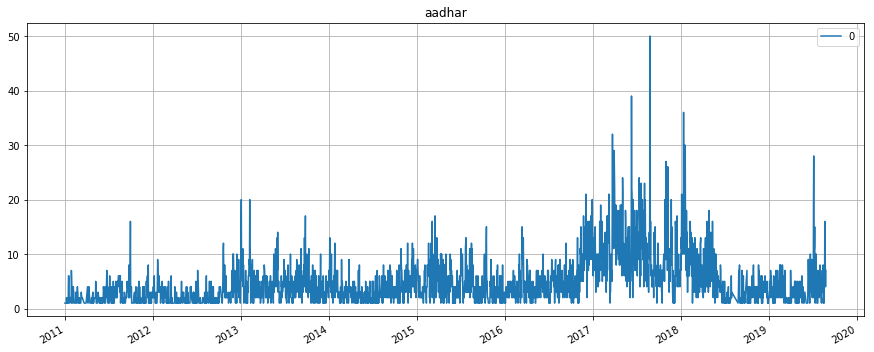

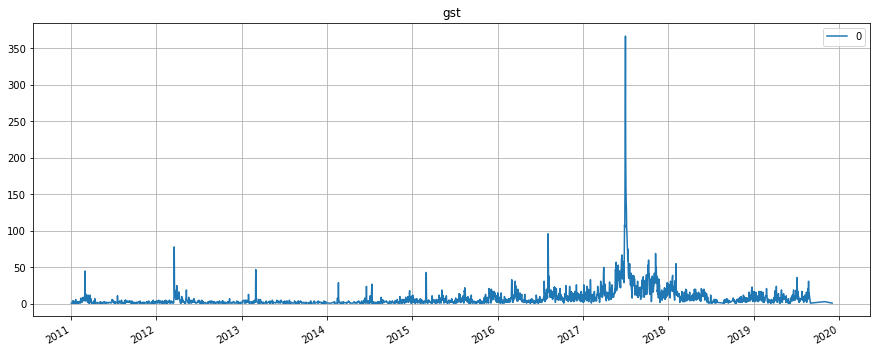

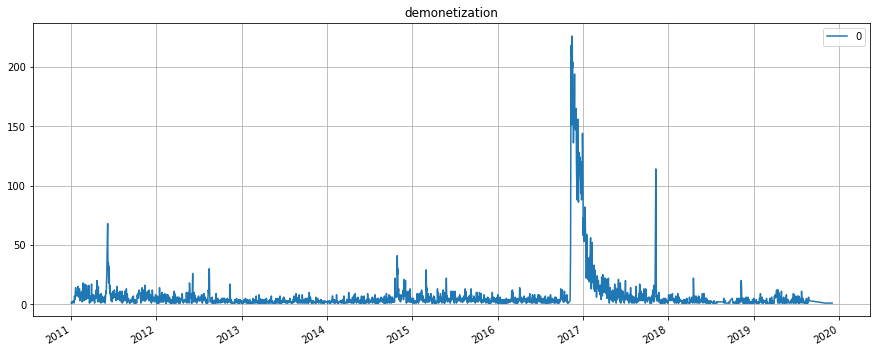

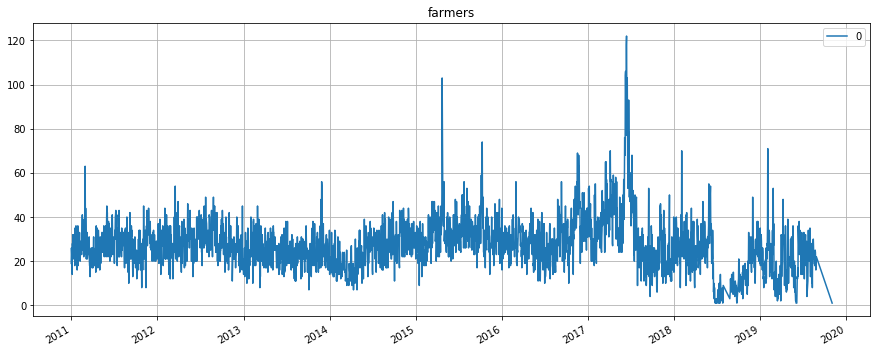

In [5]:
for policy_name in dateMap:
    total = sum(dateMap[policy_name].values)[0]
    variance = dateMap[policy_name].var(axis = 0)[0]
    mean = dateMap[policy_name].mean(axis = 0)[0]
    print( policy_name + ':\tTotal -> ', total, '; Variance -> ', variance, '; Mean -> ', mean )
    dateMap[policy_name].plot(figsize=(15, 6), grid = True, title=policy_name)

## Plot histogram for each event (per day, averaged over week)

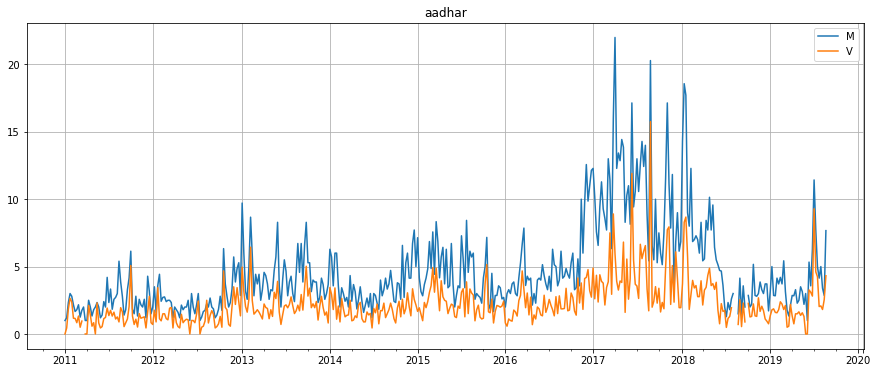

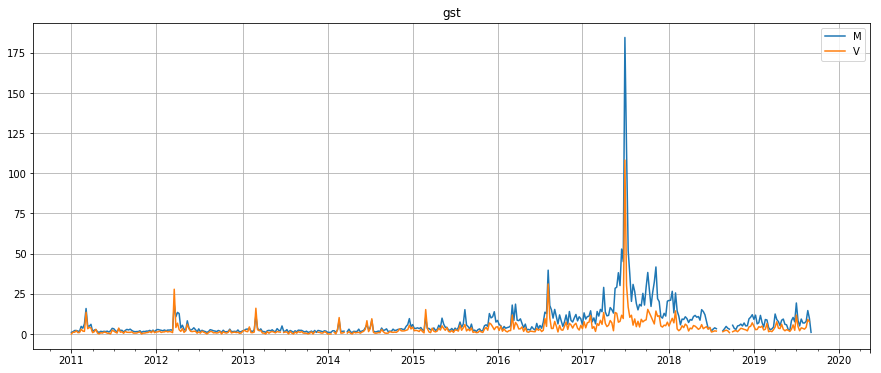

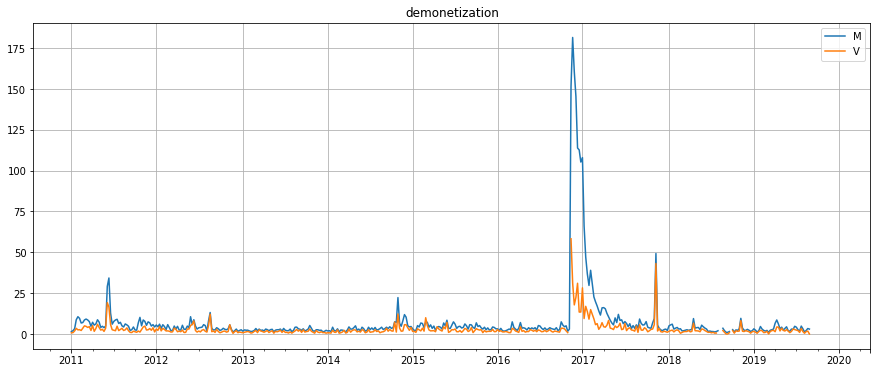

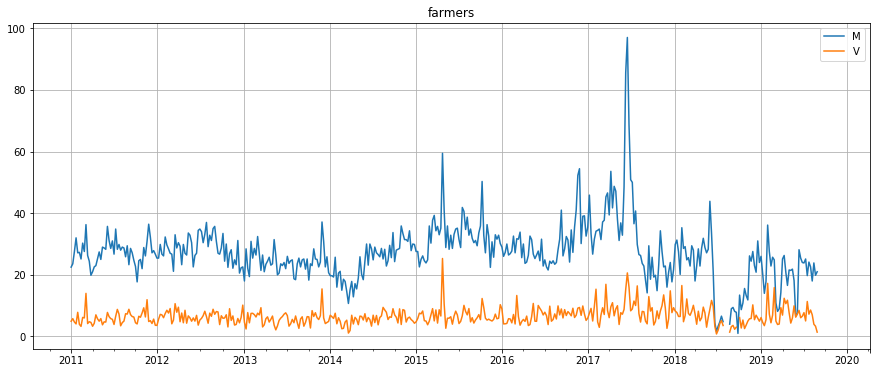

In [6]:
for policy_name in dateMap:
    #y['2012':]
    monthly_mean = dateMap[policy_name].resample('W').mean()
    monthly_var = dateMap[policy_name].resample('W').std()
    
    meanPlot = monthly_mean.plot()
    stdPlot = monthly_var.plot(ax=meanPlot, figsize=(15, 6), grid = True, title=policy_name)
    stdPlot.legend('MV')

## Plot histogram for each event (per day, averaged over month)

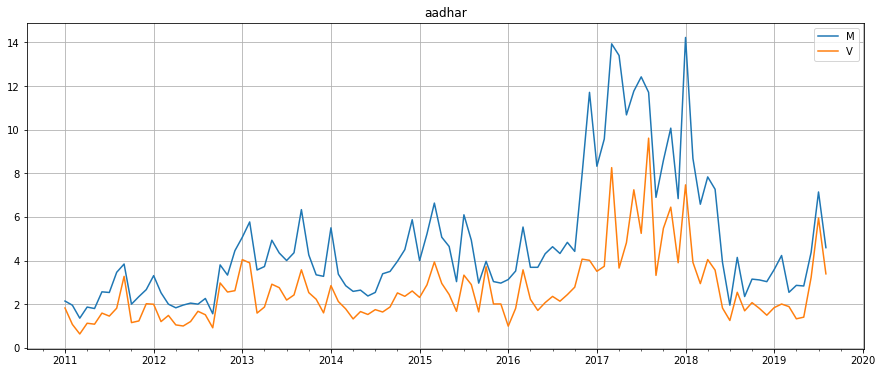

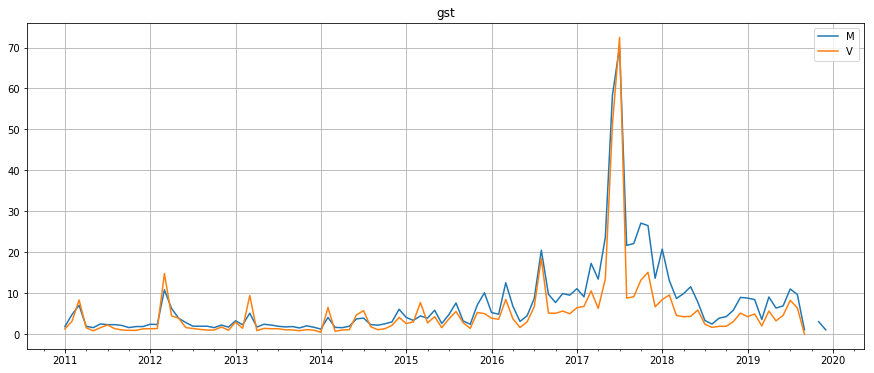

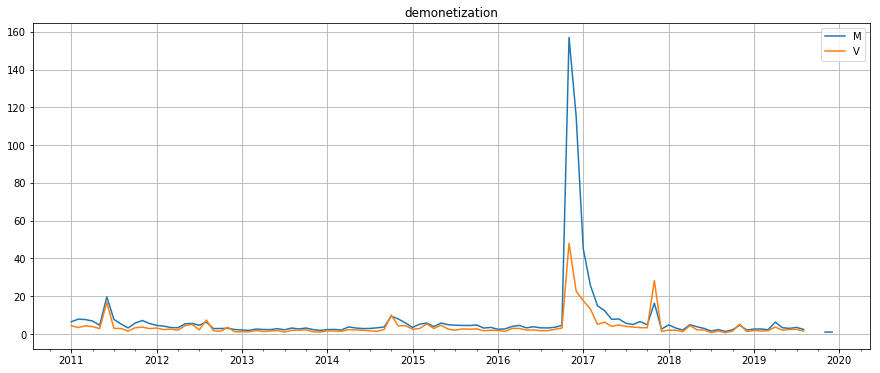

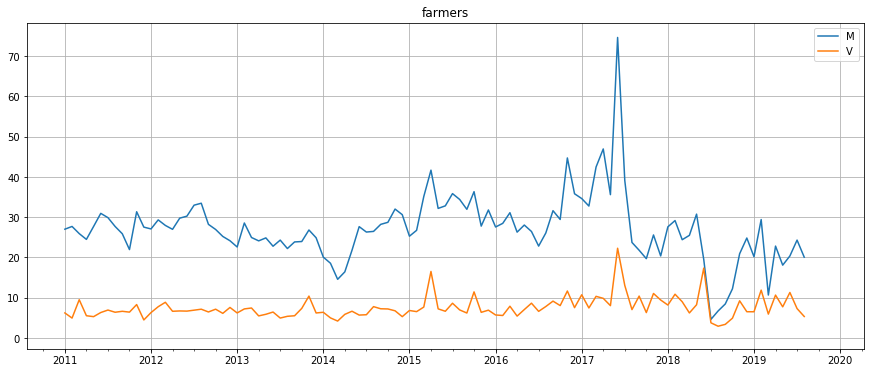

In [7]:
for policy_name in dateMap:
    #y['2012':]
    monthly_mean = dateMap[policy_name].resample('MS').mean()
    monthly_var = dateMap[policy_name].resample('MS').std()
    
    meanPlot = monthly_mean.plot()
    stdPlot = monthly_var.plot(ax=meanPlot, figsize=(15, 6), grid = True, title=policy_name)
    stdPlot.legend('MV')

## Plot histogram for each event (per day, averaged over year)

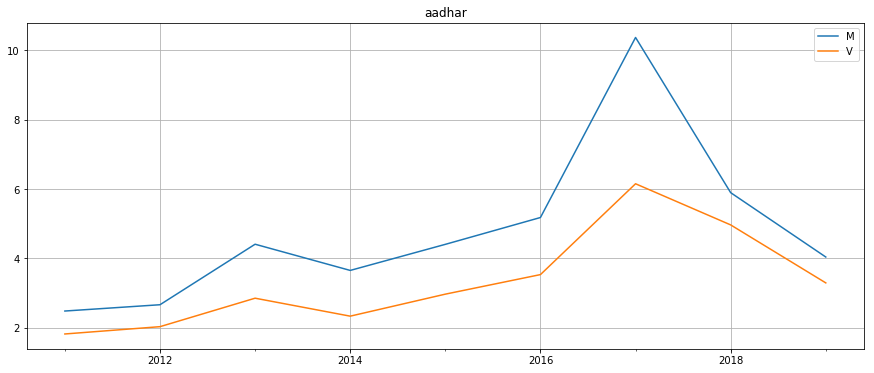

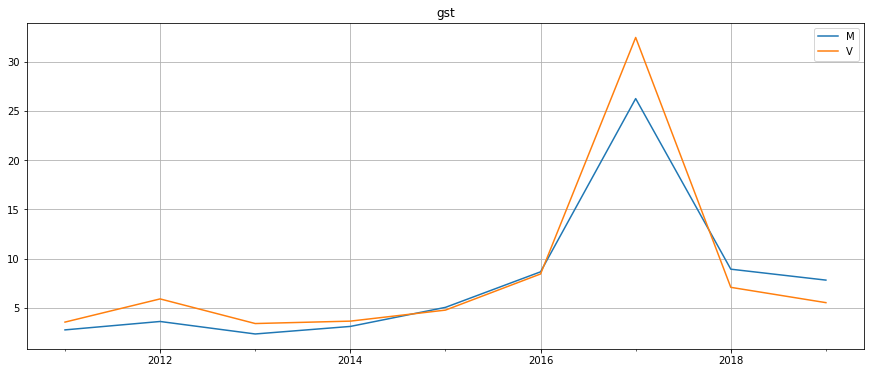

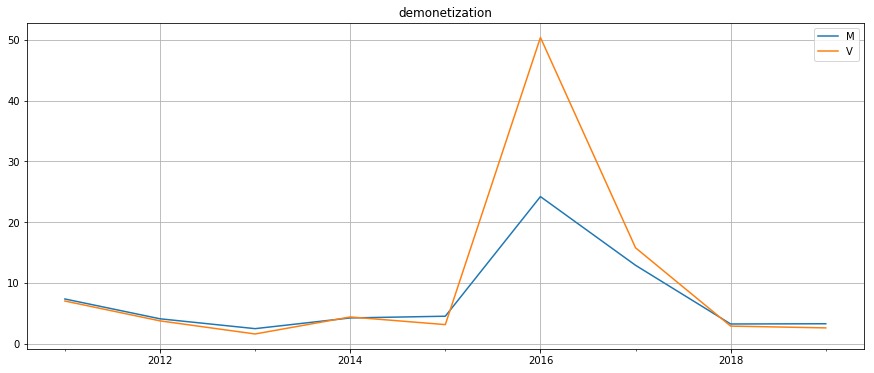

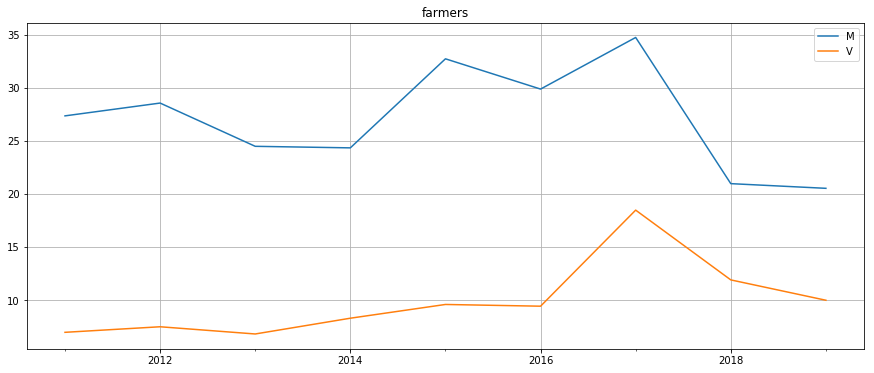

In [8]:
for policy_name in dateMap:
    #y['2012':]
    monthly_mean = dateMap[policy_name].resample('1y').mean()
    monthly_var = dateMap[policy_name].resample('1y').std()
    
    meanPlot = monthly_mean.plot()
    stdPlot = monthly_var.plot(ax=meanPlot, figsize=(15, 6), grid = True, title=policy_name)
    stdPlot.legend('MV')

## Plot histogram for each event (fortnightly, averaged over year)

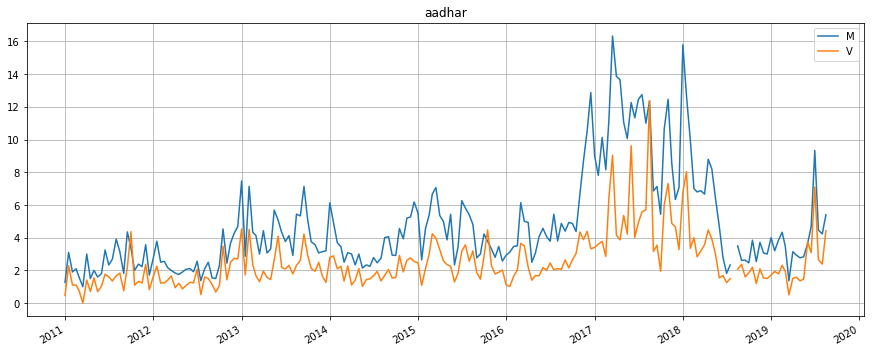

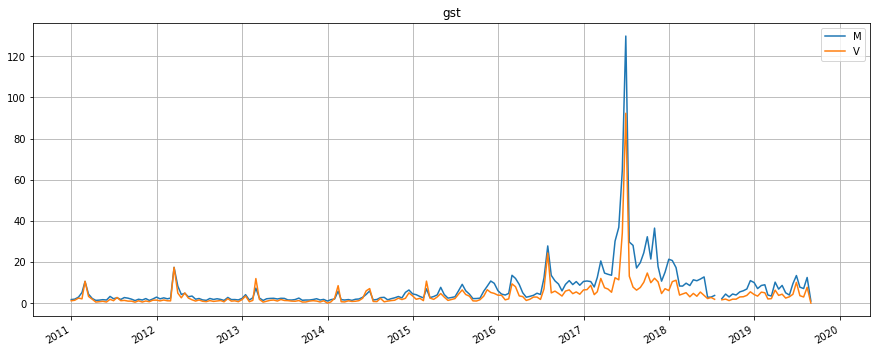

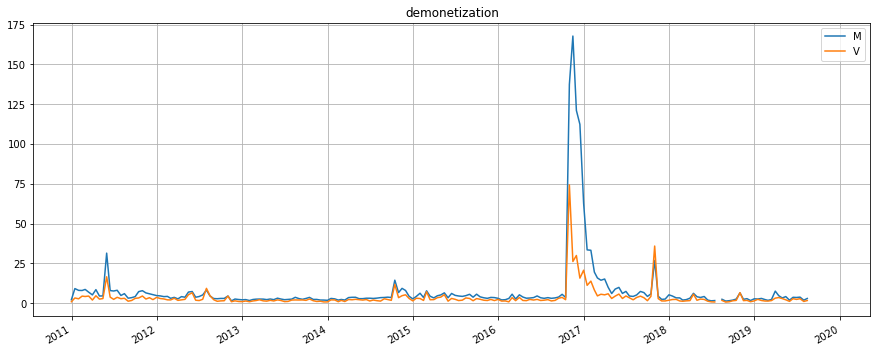

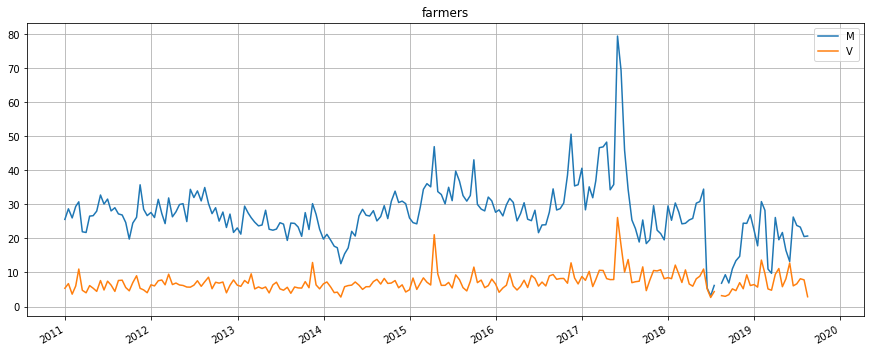

In [9]:
for policy_name in dateMap:
    #y['2012':]
    monthly_mean = dateMap[policy_name].resample('SM').mean()
    monthly_var = dateMap[policy_name].resample('SM').std()
    
    meanPlot = monthly_mean.plot()
    stdPlot = monthly_var.plot(ax=meanPlot, figsize=(15, 6), grid = True, title=policy_name)
    stdPlot.legend('MV')

### Data timelines used as in the paper to validate -> http://www.cse.iitd.ernet.in/~aseth/ictdx-final68.pdf

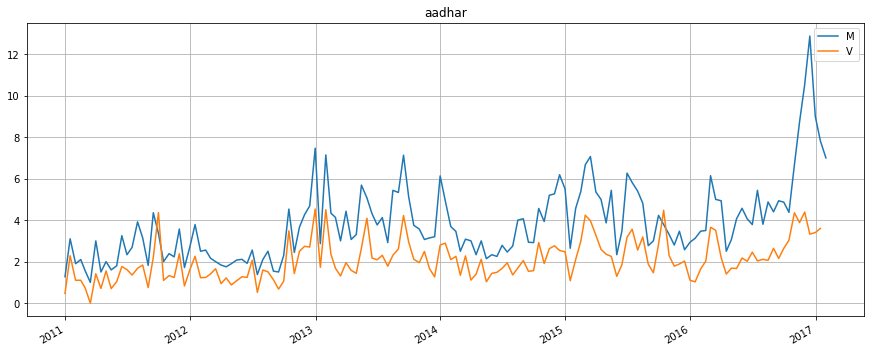

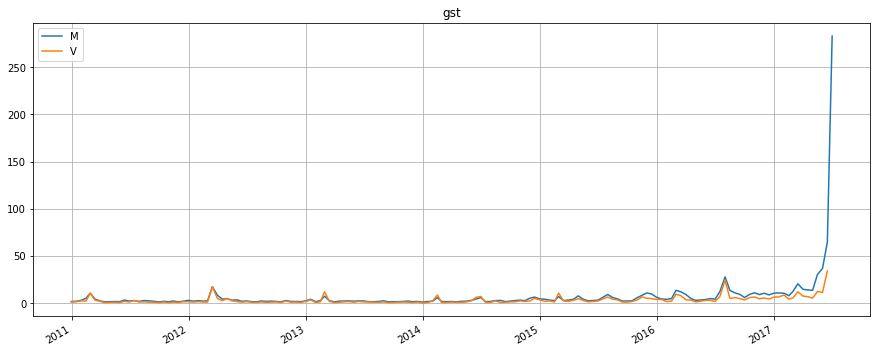

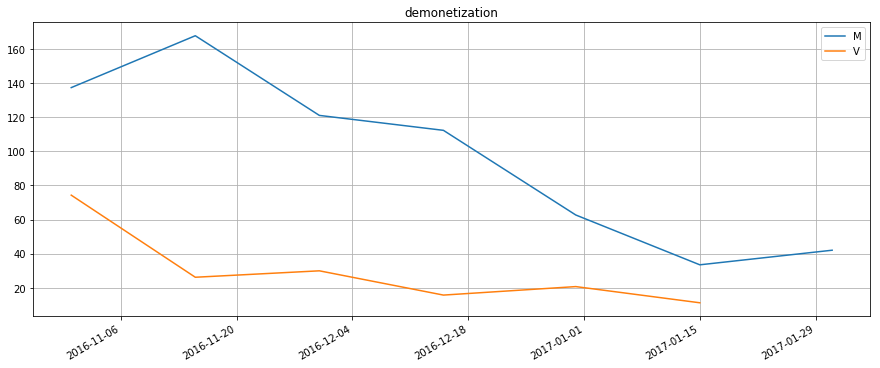

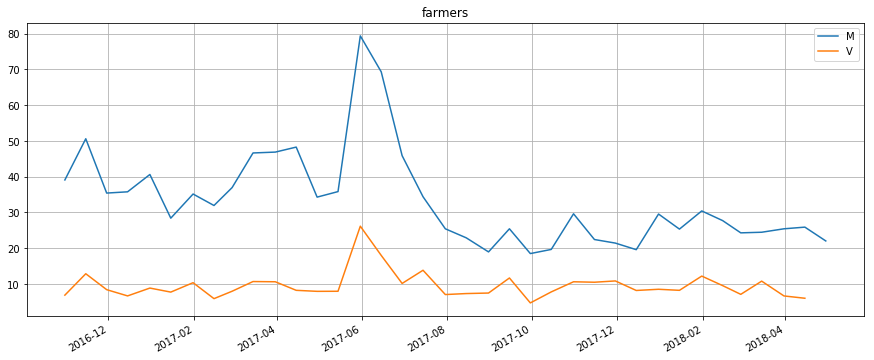

In [21]:
# demo-> nov'16-jan'17
# aadhar-> '11-'17
# gst-> jan'11-jun'17
# farmers-> nov'16-apr'18
properDateMap = copy.deepcopy(dateMap)
properDateMap['demonetization'] = properDateMap['demonetization']['2016-11':'2017-1']
properDateMap['aadhar'] = properDateMap['aadhar']['2011-1':'2017-1']
properDateMap['gst'] = properDateMap['gst']['2011-1':'2017-6']
properDateMap['farmers'] = properDateMap['farmers']['2016-11':'2018-4']

for policy_name in properDateMap:
    #y['2012':]
    monthly_mean = properDateMap[policy_name].resample('SM').mean()
    monthly_var = properDateMap[policy_name].resample('SM').std()
    
    meanPlot = monthly_mean.plot()
    stdPlot = monthly_var.plot(ax=meanPlot, figsize=(15, 6), grid = True, title=policy_name)
    stdPlot.legend('MV')

### Data from - (the start as used in paper), (till now)
#### Demonetisation-> Nov'16-Jan'17
#### Aadhar-> Jan'11-Jan'17
#### Gst-> Jan'11-Jun'17
#### Farmers-> Nov'16-Apr'18

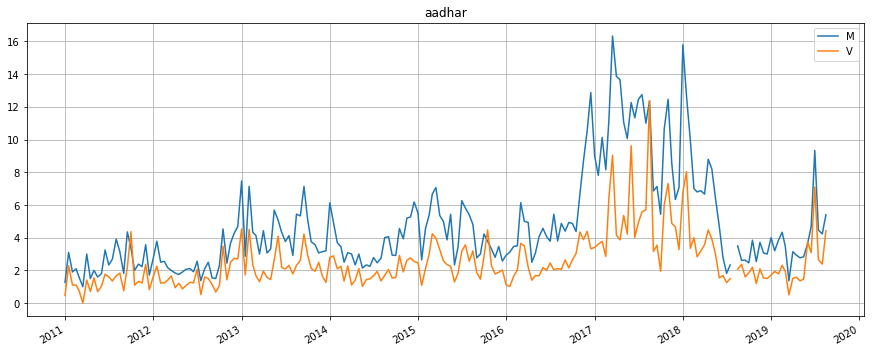

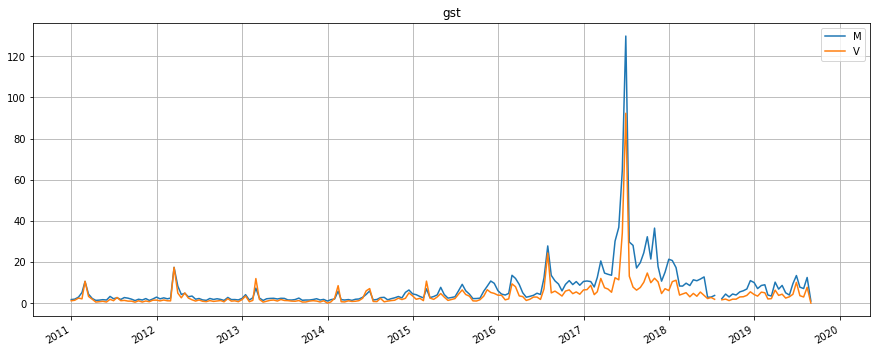

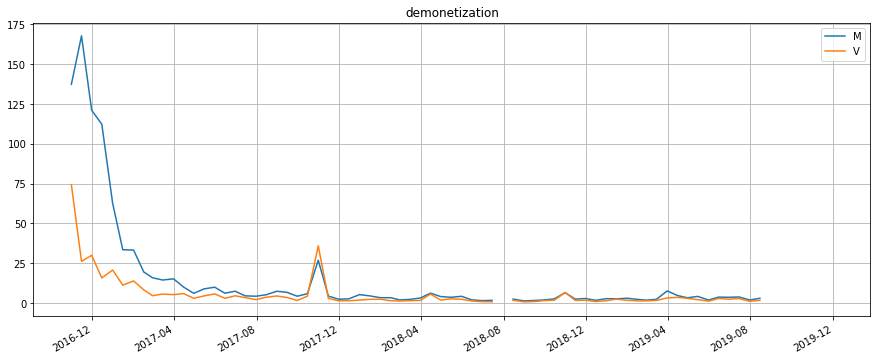

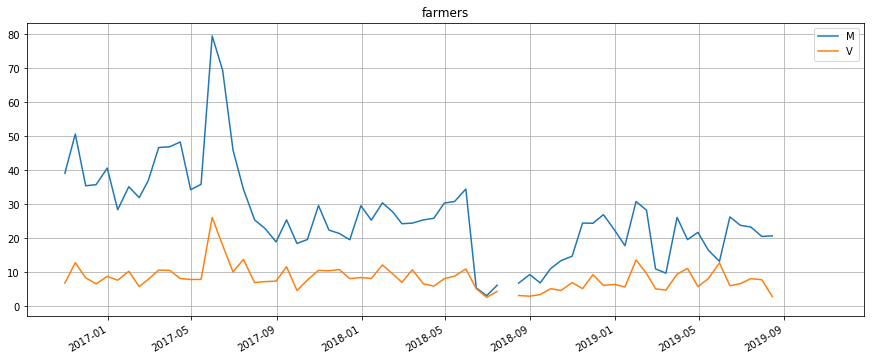

In [25]:
properDateMap = copy.deepcopy(dateMap)
properDateMap['demonetization'] = properDateMap['demonetization']['2016-11':]
properDateMap['aadhar'] = properDateMap['aadhar']['2011-1':]
properDateMap['gst'] = properDateMap['gst']['2011-1':]
properDateMap['farmers'] = properDateMap['farmers']['2016-11':]

for policy_name in properDateMap:
    #y['2012':]
    monthly_mean = properDateMap[policy_name].resample('SM').mean()
    monthly_var = properDateMap[policy_name].resample('SM').std()
    
    meanPlot = monthly_mean.plot()
    stdPlot = monthly_var.plot(ax=meanPlot, figsize=(15, 6), grid = True, title=policy_name)
    stdPlot.legend('MV')

In [ ]:
client = MongoClient('mongodb://10.237.26.159', 27017)
database = client['media-db']
collection_all = database['articles']
old_articles = {}
old_articles[policy_name] = {}

old_keys = list(past_lda_map[policy_name].keys())
for key in old_keys:
    cursor = collection_all.find( { '_id' : 'ObjectId(\"' + key + '\")' }, {"_id":1, "text":1 } )
    for artObj in cursor:
        old_articles[policy_name][str(artObj['_id'])] = artObj['text']
